#### Install & Import Libraries

In [45]:
%pip install yfinance pandas numpy matplotlib scipy

Note: you may need to restart the kernel to use updated packages.


In [ ]:

# Import necessary libraries
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# Import functions from scripts
from scripts.data_collection import collect_portfolio_data
from scripts.data_preprocessing import preprocess_portfolio_data
from scripts.portfolio_analysis import calculate_portfolio_metrics
from scripts.optimization import optimize_portfolio

### Multi-Sector Portfolio Optimization

This data science project conducts a comprehensive analysis and optimization of a diversified investment portfolio across five key market sectors.

**Portfolio Composition (10 stocks across 5 sectors):**
- **Technology**: NVDA, MSFT, GOOGL
- **Healthcare**: JNJ, UNH
- **Financial Services**: JPM, V
- **Consumer Staples**: KO, COST
- **Energy**: XOM

**Project Components:**
- **Data Collection**: Gathered 7 years of historical stock price data (2016-2022) for portfolio analysis

- **Data Preprocessing**: Cleaned and transformed raw price data, calculating daily returns, log returns, and rolling volatility metrics

- **Correlation Analysis**: Examined diversification benefits by analyzing correlation patterns within and across sectors

- **Portfolio Optimization**: Implemented mean-variance optimization using two strategies:
  - Sharpe ratio maximization for optimal risk-adjusted returns
  - Minimum variance for conservative risk management

- **Performance Metrics**: Calculated annualized returns, volatility, Sharpe ratios, and optimal asset allocations

This framework can be adapted to analyze any stock portfolio by modifying the `portfolio_symbols` list in the data collection module.

### Collect Data

In [47]:
%run scripts/data_collection.py

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [48]:
portfolio_symbols = ["NVDA", "MSFT", "GOOGL", "JNJ", "UNH", "JPM", "V", "KO", "COST", "XOM"]

In [49]:
portfolio_data = pd.read_csv("data/stock_data.csv")
display(portfolio_data)

,Date,NVDA,MSFT,GOOGL,JNJ,UNH,JPM,V,KO,COST,XOM
0,2016-02-01,0.714703,47.904644,38.249500,79.122627,98.732574,45.008953,69.346939,31.402882,127.268410,49.230331
1,2016-02-02,0.684456,46.407360,38.752701,78.394844,97.020172,43.609612,68.433228,30.993929,124.954445,48.133308
2,2016-02-03,0.687871,45.671844,37.188023,78.948242,96.057442,43.900181,69.346939,31.198410,123.439796,50.643559
3,2016-02-04,0.688115,45.531757,36.227779,78.766319,97.292770,44.657223,68.694267,31.059641,120.562088,51.514709
4,2016-02-05,0.644696,43.920616,34.924126,76.219109,95.179947,44.160183,66.699089,30.993929,121.159561,51.676033
...,...,...,...,...,...,...,...,...,...,...,...
2509,2026-01-23,187.669998,465.950012,327.929993,220.139999,356.260010,297.720001,326.179993,72.879997,983.250000,134.970001
2510,2026-01-26,186.470001,470.279999,333.260010,221.490005,351.640015,301.040009,328.489990,72.559998,977.669983,134.839996
2511,2026-01-27,188.520004,480.579987,334.549988,224.440002,282.700012,300.309998,325.260010,73.550003,970.280029,136.830002
2512,2026-01-28,191.520004,481.630005,336.010010,227.720001,294.019989,300.769989,326.980011,73.059998,960.780029,137.580002


### Exploratory Data Visualization

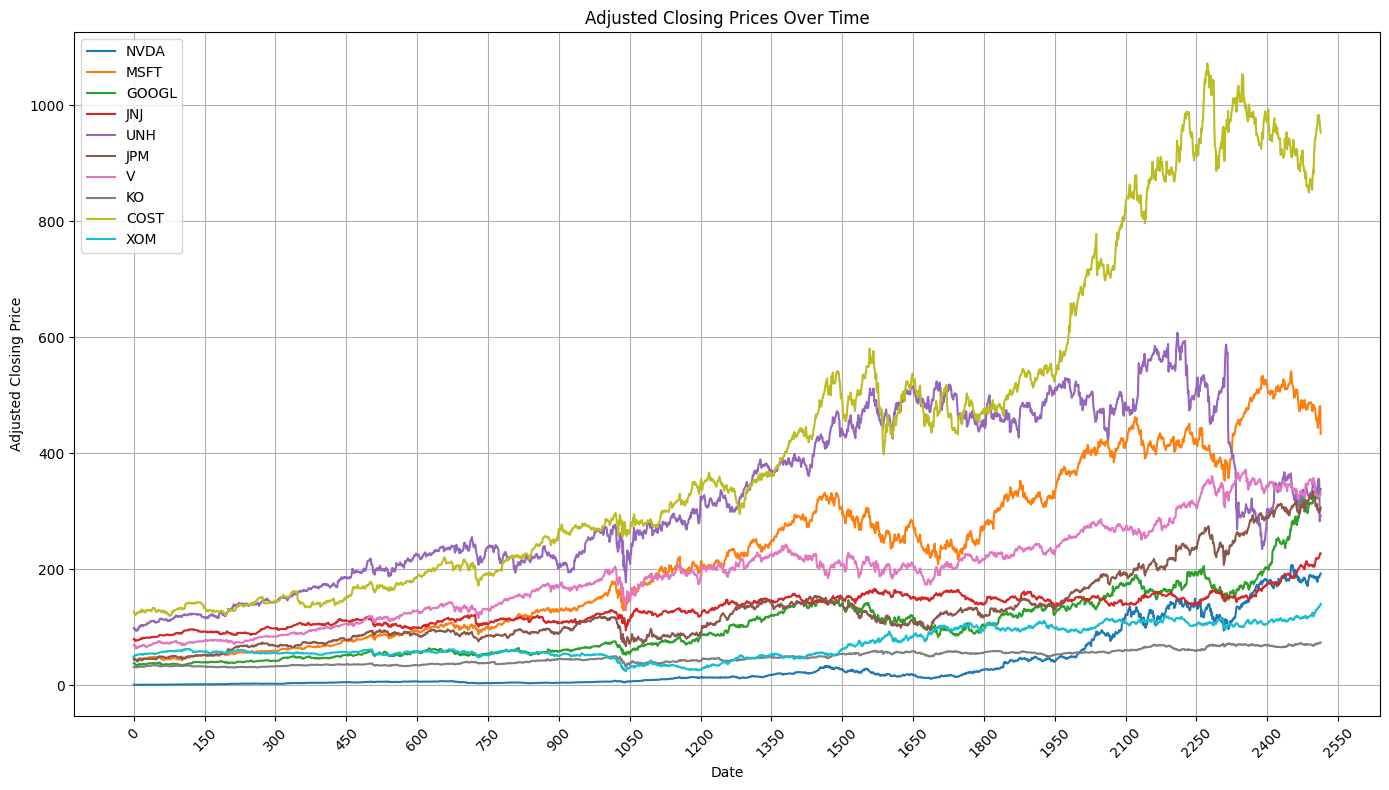

In [50]:
# Plot the adjusted closing prices for each stock
plt.figure(figsize=(14, 8))
for symbol in portfolio_symbols:
    plt.plot(portfolio_data.index, portfolio_data[symbol], label=symbol)

plt.xlabel("Date")
plt.ylabel("Adjusted Closing Price")
plt.title("Adjusted Closing Prices Over Time")
plt.legend(loc="upper left")
plt.grid(True)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Reduce the number of displayed date labels
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(20))

# Show the plot
plt.tight_layout()
plt.show()

### Section 1: Preprocess data

In [51]:
# Preprocess portfolio data using the preprocess_portfolio_data function
preprocessed_data = preprocess_portfolio_data(portfolio_data)

display(preprocessed_data)

,Date,NVDA,MSFT,GOOGL,JNJ,UNH,JPM,V,KO,COST,...,Rolling Std (NVDA),Rolling Std (MSFT),Rolling Std (GOOGL),Rolling Std (JNJ),Rolling Std (UNH),Rolling Std (JPM),Rolling Std (V),Rolling Std (KO),Rolling Std (COST),Rolling Std (XOM)
0,2016-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2016-02-02,-0.042321,-0.031256,0.013156,-0.009198,-0.017344,-0.031090,-0.013176,-0.013023,-0.018182,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2016-02-03,0.004989,-0.015849,-0.040376,0.007059,-0.009923,0.006663,0.013352,0.006597,-0.012122,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2016-02-04,0.000355,-0.003067,-0.025821,-0.002304,0.012860,0.017245,-0.009412,-0.004448,-0.023313,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2016-02-05,-0.063098,-0.035385,-0.035985,-0.032339,-0.021716,-0.011130,-0.029044,-0.002116,0.004956,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2509,2026-01-23,0.015311,0.032828,-0.007896,0.007552,0.005050,-0.019464,-0.000552,0.014053,0.007253,...,0.015991,0.013960,0.011059,0.010374,0.015593,0.016112,0.012833,0.010901,0.012497,0.017078
2510,2026-01-26,-0.006394,0.009293,0.016254,0.006132,-0.012968,0.011151,0.007082,-0.004391,-0.005675,...,0.016038,0.014161,0.011467,0.010291,0.016052,0.016170,0.012918,0.010994,0.012422,0.017061
2511,2026-01-27,0.010994,0.021902,0.003871,0.013319,-0.196053,-0.002425,-0.009833,0.013644,-0.007559,...,0.016067,0.015119,0.011410,0.010482,0.047303,0.016174,0.012959,0.011229,0.012752,0.017071
2512,2026-01-28,0.015913,0.002185,0.004364,0.014614,0.040042,0.001532,0.005288,-0.006662,-0.009791,...,0.016213,0.015131,0.011388,0.010692,0.048441,0.016086,0.013119,0.011410,0.012942,0.017036


### Section 2: Portfolio Metrics

In [52]:
# Calculate portfolio metrics using the imported function
portfolio_metrics = calculate_portfolio_metrics(preprocessed_data)

# Display portfolio metrics
print("Section 1: Portfolio Metrics")
print(portfolio_metrics)

Section 1: Portfolio Metrics
{'Portfolio Return (Annualized)': np.float64(0.2366705437664103), 'Portfolio Risk (Annualized)': np.float64(0.18094944596189588), 'Sharpe Ratio': np.float64(1.3079373772509262), 'Mean Returns (Daily)': NVDA     0.002717
MSFT     0.001020
GOOGL    0.001032
JNJ      0.000487
UNH      0.000611
JPM      0.000914
V        0.000741
KO       0.000403
COST     0.000897
XOM      0.000571
dtype: float64, 'Mean Returns (Annualized)': NVDA     0.684764
MSFT     0.256996
GOOGL    0.260001
JNJ      0.122621
UNH      0.154024
JPM      0.230208
V        0.186635
KO       0.101648
COST     0.226011
XOM      0.143798
dtype: float64, 'Standard Deviation (Daily)': NVDA     0.031383
MSFT     0.016906
GOOGL    0.018112
JNJ      0.011530
UNH      0.018720
JPM      0.017342
V        0.015336
KO       0.011399
COST     0.013798
XOM      0.017501
dtype: float64, 'Standard Deviation (Annualized)': NVDA     0.498197
MSFT     0.268374
GOOGL    0.287515
JNJ      0.183034
UNH      0.2971

### Section 3: Optimized Portfolio Weights

In [53]:
# # Calculate expected returns and covariance matrix
# returns_columns = [col for col in preprocessed_data.columns if "Returns" in col]
# expected_returns = preprocessed_data[returns_columns].mean()
# cov_matrix = preprocessed_data[returns_columns].cov()

# # Define optimization constraints (e.g., minimum/maximum allocation, target return)
# constraints = {
#     "min_allocation": [0.0] * len(portfolio_symbols),  # Minimum allocation for each asset
#     "max_allocation": [1.0] * len(portfolio_symbols),  # Maximum allocation for each asset
# }

# # Define the risk-free rate (adjust as needed)
# risk_free_rate = 0.03  # Example risk-free rate

# Calculate expected returns and covariance matrix
# Get only the actual stock return columns (not log returns or rolling stats)
returns_columns = [col for col in preprocessed_data.columns if col in portfolio_symbols]
expected_returns = preprocessed_data[returns_columns].mean() * 252  # ANNUALIZE!
cov_matrix = preprocessed_data[returns_columns].cov() * 252  # ANNUALIZE!

# Define optimization constraints (e.g., minimum/maximum allocation, target return)
constraints = {
    "min_allocation": [0.0] * len(portfolio_symbols),  # Minimum allocation for each asset
    "max_allocation": [1.0] * len(portfolio_symbols),  # Maximum allocation for each asset
}

# Define the risk-free rate (adjust as needed)
risk_free_rate = 0.03  # Example risk-free rate (3% annual)

In [54]:
# Optimize portfolio allocation using the optimize_portfolio function
optimized_portfolio = optimize_portfolio(expected_returns, cov_matrix, constraints, risk_free_rate)

In [55]:
# Print the optimized portfolio results
print("Optimized Portfolio Weights:")

print(optimized_portfolio["Portfolio Weights"])

print("\nPortfolio Return:", optimized_portfolio["Portfolio Return"])
print("Portfolio Volatility:", optimized_portfolio["Portfolio Volatility"])
print("Sharpe Ratio:", optimized_portfolio["Sharpe Ratio"])

Optimized Portfolio Weights:
[3.90340452e-01 1.05167611e-17 3.83265468e-17 1.90809357e-01
 6.28837260e-18 1.19784943e-01 0.00000000e+00 3.24718551e-17
 2.99065248e-01 0.00000000e+00]

Portfolio Return: 0.385855595957615
Portfolio Volatility: 0.2513429817056893
Sharpe Ratio: 1.4158167200160972


### Minimum Variance Portfolio

The minimum variance portfolio minimizes risk (volatility) without considering returns - ideal for risk-averse investors.

MINIMUM VARIANCE PORTFOLIO

Portfolio Return:     14.72%
Portfolio Volatility: 14.58%
Sharpe Ratio:         0.8039

COMPARISON: All Three Portfolio Strategies

📊 Portfolio Weights Comparison:


/var/folders/xh/pw8bqmds2zv_n5f5qwk66jvr0000gn/T/ipykernel_47394/3206188257.py:32: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  comparison_df_formatted = comparison_df.applymap(lambda x: f'{x:.1%}')


,Equal Weight,Max Sharpe,Min Variance
NVDA,10.0%,39.0%,0.0%
MSFT,10.0%,0.0%,0.0%
GOOGL,10.0%,0.0%,6.3%
JNJ,10.0%,19.1%,33.2%
UNH,10.0%,0.0%,2.4%
JPM,10.0%,12.0%,0.0%
V,10.0%,0.0%,0.0%
KO,10.0%,0.0%,30.2%
COST,10.0%,29.9%,18.9%
XOM,10.0%,0.0%,8.9%



📈 Performance Metrics Comparison:


,Return (Ann.),Volatility (Ann.),Sharpe Ratio
Equal Weight,0.2367,0.1809,1.3079
Max Sharpe,0.3859,0.2513,1.4158
Min Variance,0.1472,0.1458,0.8039


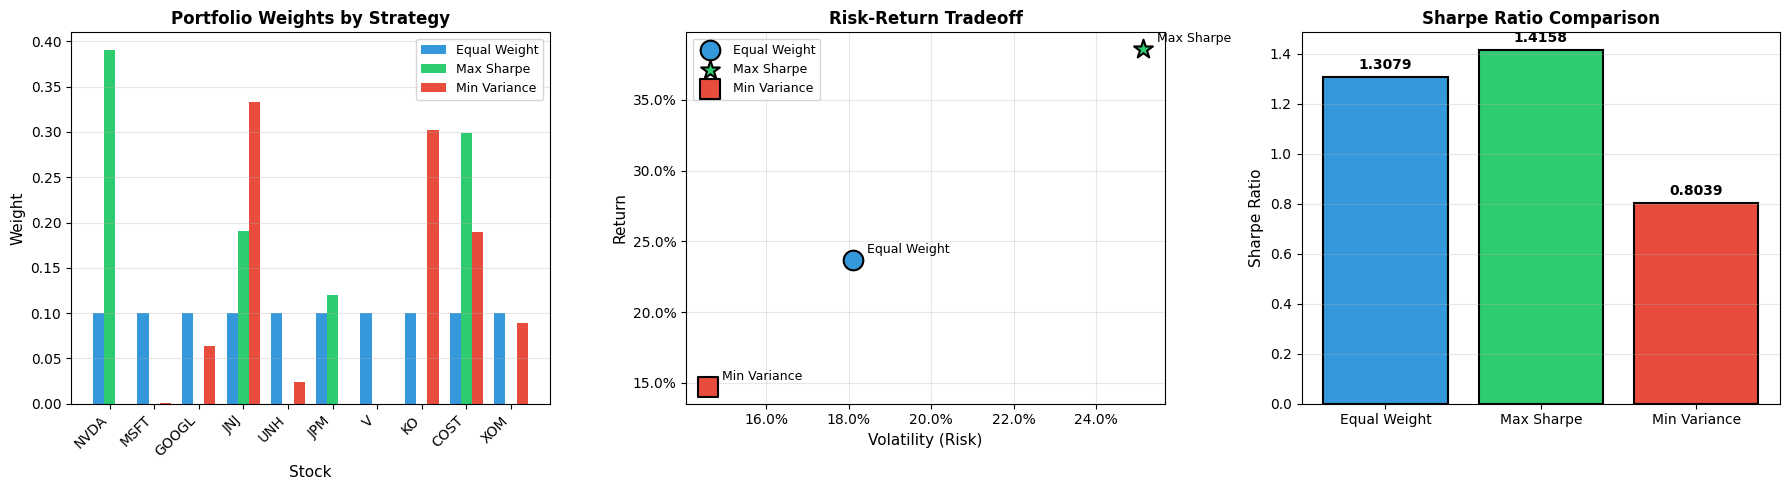


📌 KEY INSIGHTS:
• Max Sharpe portfolio offers highest risk-adjusted returns (Sharpe: 1.4158)
• Min Variance portfolio has lowest risk (14.58% volatility)
• Equal Weight provides diversification but suboptimal risk-adjusted returns

• For aggressive investors: Max Sharpe (higher return, higher risk)
• For conservative investors: Min Variance (lower return, lower risk)


In [56]:
# ============================================================
# MINIMUM VARIANCE PORTFOLIO OPTIMIZATION
# ============================================================

# Run minimum variance optimization
min_var_portfolio = optimize_portfolio(expected_returns, cov_matrix, constraints, risk_free_rate, method='min_variance')

# Print the minimum variance portfolio results
print("=" * 70)
print("MINIMUM VARIANCE PORTFOLIO")
print("=" * 70)
print(f"\nPortfolio Return:     {min_var_portfolio['Portfolio Return']:.2%}")
print(f"Portfolio Volatility: {min_var_portfolio['Portfolio Volatility']:.2%}")
print(f"Sharpe Ratio:         {min_var_portfolio['Sharpe Ratio']:.4f}")

# ============================================================
# COMPARE ALL THREE STRATEGIES
# ============================================================

print("\n" + "=" * 70)
print("COMPARISON: All Three Portfolio Strategies")
print("=" * 70)

# Create comparison DataFrame for weights
comparison_df = pd.DataFrame({
    'Equal Weight': [0.1] * 10,
    'Max Sharpe': optimized_portfolio['Portfolio Weights'],
    'Min Variance': min_var_portfolio['Portfolio Weights']
}, index=portfolio_symbols)

# Format weights as percentages
comparison_df_formatted = comparison_df.applymap(lambda x: f'{x:.1%}')

print("\n📊 Portfolio Weights Comparison:")
display(comparison_df_formatted)

# Create metrics comparison
metrics_comparison = pd.DataFrame({
    'Equal Weight': {
        'Return (Ann.)': portfolio_metrics['Portfolio Return (Annualized)'],
        'Volatility (Ann.)': portfolio_metrics['Portfolio Risk (Annualized)'],
        'Sharpe Ratio': portfolio_metrics['Sharpe Ratio']
    },
    'Max Sharpe': {
        'Return (Ann.)': optimized_portfolio['Portfolio Return'],
        'Volatility (Ann.)': optimized_portfolio['Portfolio Volatility'],
        'Sharpe Ratio': optimized_portfolio['Sharpe Ratio']
    },
    'Min Variance': {
        'Return (Ann.)': min_var_portfolio['Portfolio Return'],
        'Volatility (Ann.)': min_var_portfolio['Portfolio Volatility'],
        'Sharpe Ratio': min_var_portfolio['Sharpe Ratio']
    }
}).T

print("\n📈 Performance Metrics Comparison:")
display(metrics_comparison.round(4))

# ============================================================
# VISUALIZATION: Three-Strategy Comparison
# ============================================================

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot 1: Weights comparison (grouped bar chart)
x = np.arange(len(portfolio_symbols))
width = 0.25

bars1 = axes[0].bar(x - width, comparison_df['Equal Weight'], width, label='Equal Weight', color='#3498db')
bars2 = axes[0].bar(x, comparison_df['Max Sharpe'], width, label='Max Sharpe', color='#2ecc71')
bars3 = axes[0].bar(x + width, comparison_df['Min Variance'], width, label='Min Variance', color='#e74c3c')

axes[0].set_xlabel('Stock', fontsize=11)
axes[0].set_ylabel('Weight', fontsize=11)
axes[0].set_title('Portfolio Weights by Strategy', fontsize=12, fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(portfolio_symbols, rotation=45, ha='right')
axes[0].legend(loc='upper right', fontsize=9)
axes[0].grid(axis='y', alpha=0.3)

# Plot 2: Risk-Return scatter
strategies = ['Equal Weight', 'Max Sharpe', 'Min Variance']
returns = [portfolio_metrics['Portfolio Return (Annualized)'], 
           optimized_portfolio['Portfolio Return'], 
           min_var_portfolio['Portfolio Return']]
volatilities = [portfolio_metrics['Portfolio Risk (Annualized)'], 
                optimized_portfolio['Portfolio Volatility'], 
                min_var_portfolio['Portfolio Volatility']]
colors = ['#3498db', '#2ecc71', '#e74c3c']
markers = ['o', '*', 's']

for i, (strategy, ret, vol, color, marker) in enumerate(zip(strategies, returns, volatilities, colors, markers)):
    axes[1].scatter(vol, ret, c=color, s=200, marker=marker, label=strategy, edgecolors='black', linewidths=1.5, zorder=5)
    axes[1].annotate(strategy, (vol, ret), xytext=(10, 5), textcoords='offset points', fontsize=9)

axes[1].set_xlabel('Volatility (Risk)', fontsize=11)
axes[1].set_ylabel('Return', fontsize=11)
axes[1].set_title('Risk-Return Tradeoff', fontsize=12, fontweight='bold')
axes[1].legend(loc='upper left', fontsize=9)
axes[1].grid(True, alpha=0.3)

# Format as percentages
from matplotlib.ticker import PercentFormatter
axes[1].xaxis.set_major_formatter(PercentFormatter(1))
axes[1].yaxis.set_major_formatter(PercentFormatter(1))

# Plot 3: Sharpe Ratio comparison
sharpe_values = [portfolio_metrics['Sharpe Ratio'], 
                 optimized_portfolio['Sharpe Ratio'], 
                 min_var_portfolio['Sharpe Ratio']]

bars = axes[2].bar(strategies, sharpe_values, color=colors, edgecolor='black', linewidth=1.5)

for bar, val in zip(bars, sharpe_values):
    axes[2].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02,
                 f'{val:.4f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

axes[2].set_ylabel('Sharpe Ratio', fontsize=11)
axes[2].set_title('Sharpe Ratio Comparison', fontsize=12, fontweight='bold')
axes[2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# ============================================================
# KEY INSIGHTS
# ============================================================
print("\n" + "=" * 70)
print("📌 KEY INSIGHTS:")
print("=" * 70)
print(f"• Max Sharpe portfolio offers highest risk-adjusted returns (Sharpe: {optimized_portfolio['Sharpe Ratio']:.4f})")
print(f"• Min Variance portfolio has lowest risk ({min_var_portfolio['Portfolio Volatility']:.2%} volatility)")
print(f"• Equal Weight provides diversification but suboptimal risk-adjusted returns")
print(f"\n• For aggressive investors: Max Sharpe (higher return, higher risk)")
print(f"• For conservative investors: Min Variance (lower return, lower risk)")

### Portfolio Allocation Table

In [57]:
print("\nSection 4: Portfolio Allocation Table")

# Create a DataFrame to display the optimized portfolio allocation
optimized_weights = optimized_portfolio["Portfolio Weights"]

portfolio_allocation = pd.DataFrame(optimized_weights, 
                                    index=portfolio_symbols, 
                                    columns=["Allocation"])

print(portfolio_allocation)


Section 4: Portfolio Allocation Table
         Allocation
NVDA   3.903405e-01
MSFT   1.051676e-17
GOOGL  3.832655e-17
JNJ    1.908094e-01
UNH    6.288373e-18
JPM    1.197849e-01
V      0.000000e+00
KO     3.247186e-17
COST   2.990652e-01
XOM    0.000000e+00


### Portfolio Allocation Pie Chart

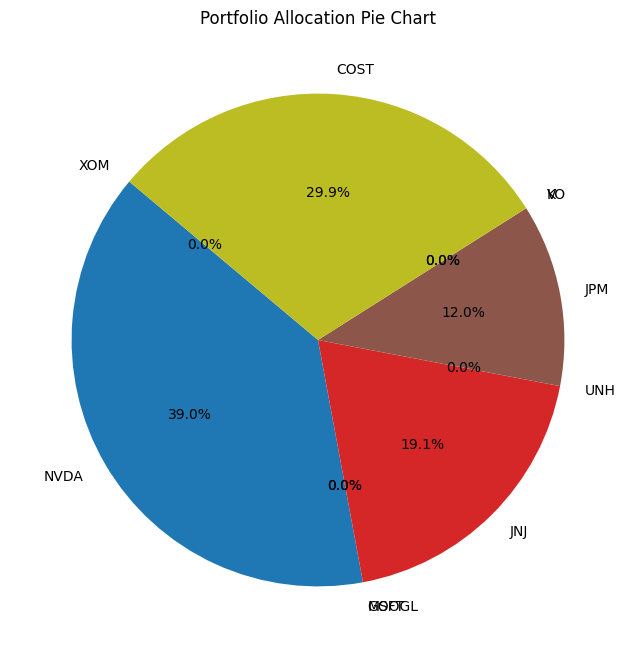

In [58]:
# Create a pie chart to visualize the portfolio allocation
plt.figure(figsize=(8, 8))
plt.pie(optimized_weights, 
        labels=portfolio_symbols, 
        autopct='%1.1f%%', startangle=140)
plt.title("Portfolio Allocation Pie Chart")
plt.show()

Optimized Portfolio Allocation Analysis
Portfolio Breakdown:

NVDA: 39.0% - Largest allocation (highest risk-adjusted returns)
COST: 29.9% - Second largest (strong returns, moderate volatility)
JNJ: 19.1% - Healthcare defensive position
JPM: 12.0% - Financial services exposure
MSFT, GOOGL, UNH, V, KO, XOM: 0.0% - Excluded by optimizer

Why This Makes Sense:
NVDA (39%) - Highest weight because:

Exceptional historical returns (68.5% annualized)
Despite high volatility (50%), the Sharpe ratio is still best
AI boom justified the risk premium

COST (30%) - Strong position because:

Solid returns (22.6% annualized)
Lower volatility than tech stocks (21.9%)
Excellent risk-adjusted returns
Low correlation with NVDA (0.37) provides diversification

JNJ (19%) - Defensive allocation:

Lowest volatility in portfolio (18.3%)
Stabilizes the portfolio
Low correlation with NVDA (0.11) - excellent diversifier

JPM (12%) - Financial exposure:

Moderate returns (23% annualized)
Moderate volatility (27.5%)
Adds sector diversity

**My thoughts:**
"The optimizer allocated 39% to NVDA despite its 50% volatility because the exceptional 68% annualized returns justified the risk. However, it balanced this with defensive positions: 30% Costco for stable consumer exposure, 19% J&J as the lowest volatility stock at 18%, and 12% JPMorgan for financial sector diversification."
Key insight: "Interestingly, the optimizer excluded Microsoft and Google despite solid tech performance, likely because NVDA already captured tech exposure efficiently, and the marginal diversification benefit didn't justify their lower risk-adjusted returns compared to Costco's retail position."
Risk management: "The portfolio achieves diversification through low correlations - NVDA-JNJ correlation is only 0.11, and NVDA-COST is 0.37, meaning these assets don't move in lockstep, reducing overall portfolio risk."

### Section 5: Equal-Weight vs Optimized Portfolio Comparison

This section compares the performance of an equal-weight portfolio (10% allocation to each stock) against the mean-variance optimized portfolio.

PORTFOLIO COMPARISON: Equal-Weight vs Optimized

📊 Performance Metrics Summary:
----------------------------------------------------------------------


,Metric,Equal-Weight,Optimized,Difference
0,Portfolio Return (Annualized),23.67%,38.59%,14.92%
1,Portfolio Volatility (Annualized),18.09%,25.13%,7.04%
2,Sharpe Ratio,1.3079,1.4158,0.1079



📈 Portfolio Weights Comparison:
----------------------------------------------------------------------


,Stock,Equal-Weight,Optimized,Change
0,NVDA,10.0%,39.0%,29.0%
1,MSFT,10.0%,0.0%,-10.0%
2,GOOGL,10.0%,0.0%,-10.0%
3,JNJ,10.0%,19.1%,9.1%
4,UNH,10.0%,0.0%,-10.0%
5,JPM,10.0%,12.0%,2.0%
6,V,10.0%,0.0%,-10.0%
7,KO,10.0%,0.0%,-10.0%
8,COST,10.0%,29.9%,19.9%
9,XOM,10.0%,0.0%,-10.0%


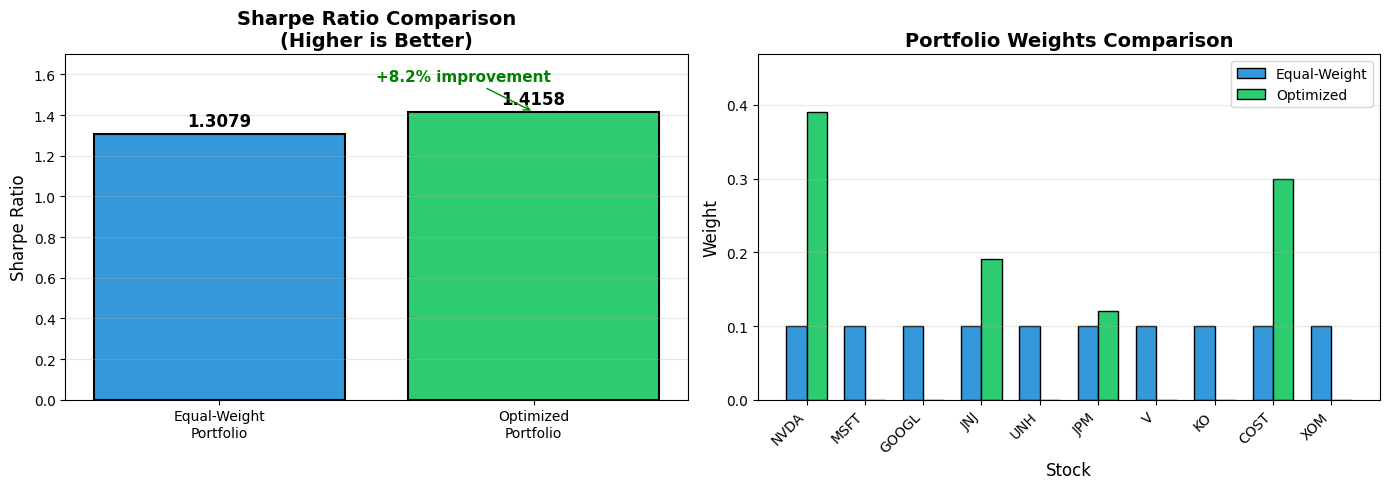


📌 KEY INSIGHTS:
• Sharpe Ratio improved by 8.2% through optimization
• Optimized portfolio concentrates on: NVDA (39.0%), COST (29.9%), JNJ (19.1%), JPM (12.0%)
• Annualized return increased from 23.67% to 38.59%
• Risk-adjusted performance is 8.2% better with optimization


In [59]:
# ============================================================
# COMPARISON: Equal-Weight vs Optimized Portfolio
# ============================================================

# Portfolio symbols
portfolio_symbols = ["NVDA", "MSFT", "GOOGL", "JNJ", "UNH", "JPM", "V", "KO", "COST", "XOM"]

# Extract metrics from equal-weight portfolio
equal_weight_return = portfolio_metrics['Portfolio Return (Annualized)']
equal_weight_volatility = portfolio_metrics['Portfolio Risk (Annualized)']
equal_weight_sharpe = portfolio_metrics['Sharpe Ratio']
equal_weight_weights = portfolio_metrics['Weights']

# Extract metrics from optimized portfolio
optimized_return = optimized_portfolio['Portfolio Return']
optimized_volatility = optimized_portfolio['Portfolio Volatility']
optimized_sharpe = optimized_portfolio['Sharpe Ratio']
optimized_weights = optimized_portfolio['Portfolio Weights']

# ============================================================
# Create Comparison Table
# ============================================================
print("=" * 70)
print("PORTFOLIO COMPARISON: Equal-Weight vs Optimized")
print("=" * 70)

# Create summary metrics DataFrame
comparison_data = {
    'Metric': ['Portfolio Return (Annualized)', 'Portfolio Volatility (Annualized)', 'Sharpe Ratio'],
    'Equal-Weight': [f'{equal_weight_return:.2%}', f'{equal_weight_volatility:.2%}', f'{equal_weight_sharpe:.4f}'],
    'Optimized': [f'{optimized_return:.2%}', f'{optimized_volatility:.2%}', f'{optimized_sharpe:.4f}'],
    'Difference': [
        f'{(optimized_return - equal_weight_return):.2%}',
        f'{(optimized_volatility - equal_weight_volatility):.2%}',
        f'{(optimized_sharpe - equal_weight_sharpe):.4f}'
    ]
}

comparison_df = pd.DataFrame(comparison_data)
print("\n📊 Performance Metrics Summary:")
print("-" * 70)
display(comparison_df)

# ============================================================
# Create Weights Comparison Table
# ============================================================
print("\n📈 Portfolio Weights Comparison:")
print("-" * 70)

weights_data = {
    'Stock': portfolio_symbols,
    'Equal-Weight': [f'{w:.1%}' for w in equal_weight_weights],
    'Optimized': [f'{w:.1%}' for w in optimized_weights],
    'Change': [f'{(opt - eq):.1%}' for opt, eq in zip(optimized_weights, equal_weight_weights)]
}

weights_df = pd.DataFrame(weights_data)
display(weights_df)

# ============================================================
# Bar Chart: Sharpe Ratio Comparison
# ============================================================
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Sharpe Ratio Comparison
sharpe_values = [equal_weight_sharpe, optimized_sharpe]
labels = ['Equal-Weight\nPortfolio', 'Optimized\nPortfolio']
colors = ['#3498db', '#2ecc71']

bars = axes[0].bar(labels, sharpe_values, color=colors, edgecolor='black', linewidth=1.5)

# Add value labels on bars
for bar, val in zip(bars, sharpe_values):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.02, 
                 f'{val:.4f}', ha='center', va='bottom', fontsize=12, fontweight='bold')

axes[0].set_ylabel('Sharpe Ratio', fontsize=12)
axes[0].set_title('Sharpe Ratio Comparison\n(Higher is Better)', fontsize=14, fontweight='bold')
axes[0].set_ylim(0, max(sharpe_values) * 1.2)
axes[0].grid(axis='y', alpha=0.3)

# Add improvement annotation
improvement = ((optimized_sharpe - equal_weight_sharpe) / equal_weight_sharpe) * 100
axes[0].annotate(f'+{improvement:.1f}% improvement', 
                 xy=(1, optimized_sharpe), 
                 xytext=(0.5, optimized_sharpe + 0.15),
                 fontsize=11, color='green', fontweight='bold',
                 arrowprops=dict(arrowstyle='->', color='green'))

# Plot 2: Weights Comparison (Side-by-side bars)
x = np.arange(len(portfolio_symbols))
width = 0.35

bars1 = axes[1].bar(x - width/2, equal_weight_weights, width, label='Equal-Weight', color='#3498db', edgecolor='black')
bars2 = axes[1].bar(x + width/2, optimized_weights, width, label='Optimized', color='#2ecc71', edgecolor='black')

axes[1].set_xlabel('Stock', fontsize=12)
axes[1].set_ylabel('Weight', fontsize=12)
axes[1].set_title('Portfolio Weights Comparison', fontsize=14, fontweight='bold')
axes[1].set_xticks(x)
axes[1].set_xticklabels(portfolio_symbols, rotation=45, ha='right')
axes[1].legend(loc='upper right')
axes[1].grid(axis='y', alpha=0.3)
axes[1].set_ylim(0, max(max(optimized_weights), max(equal_weight_weights)) * 1.2)

plt.tight_layout()
plt.show()

# ============================================================
# Summary Insights
# ============================================================
print("\n" + "=" * 70)
print("📌 KEY INSIGHTS:")
print("=" * 70)
print(f"• Sharpe Ratio improved by {improvement:.1f}% through optimization")
print(f"• Optimized portfolio concentrates on: ", end="")
top_stocks = [(portfolio_symbols[i], optimized_weights[i]) for i in range(len(portfolio_symbols)) if optimized_weights[i] > 0.05]
top_stocks.sort(key=lambda x: x[1], reverse=True)
print(", ".join([f"{s} ({w:.1%})" for s, w in top_stocks]))
print(f"• Annualized return increased from {equal_weight_return:.2%} to {optimized_return:.2%}")
print(f"• Risk-adjusted performance is {improvement:.1f}% better with optimization")

### Section 6: Efficient Frontier Visualization

The efficient frontier represents the set of optimal portfolios that offer the highest expected return for a defined level of risk. This visualization shows 10,000 randomly generated portfolios to illustrate the risk-return tradeoff.

Generating 10,000 random portfolios...
Generated 10000 portfolios!
Return range: 15.34% to 37.60%
Volatility range: 14.91% to 25.59%
Sharpe ratio range: 0.7687 to 1.3607


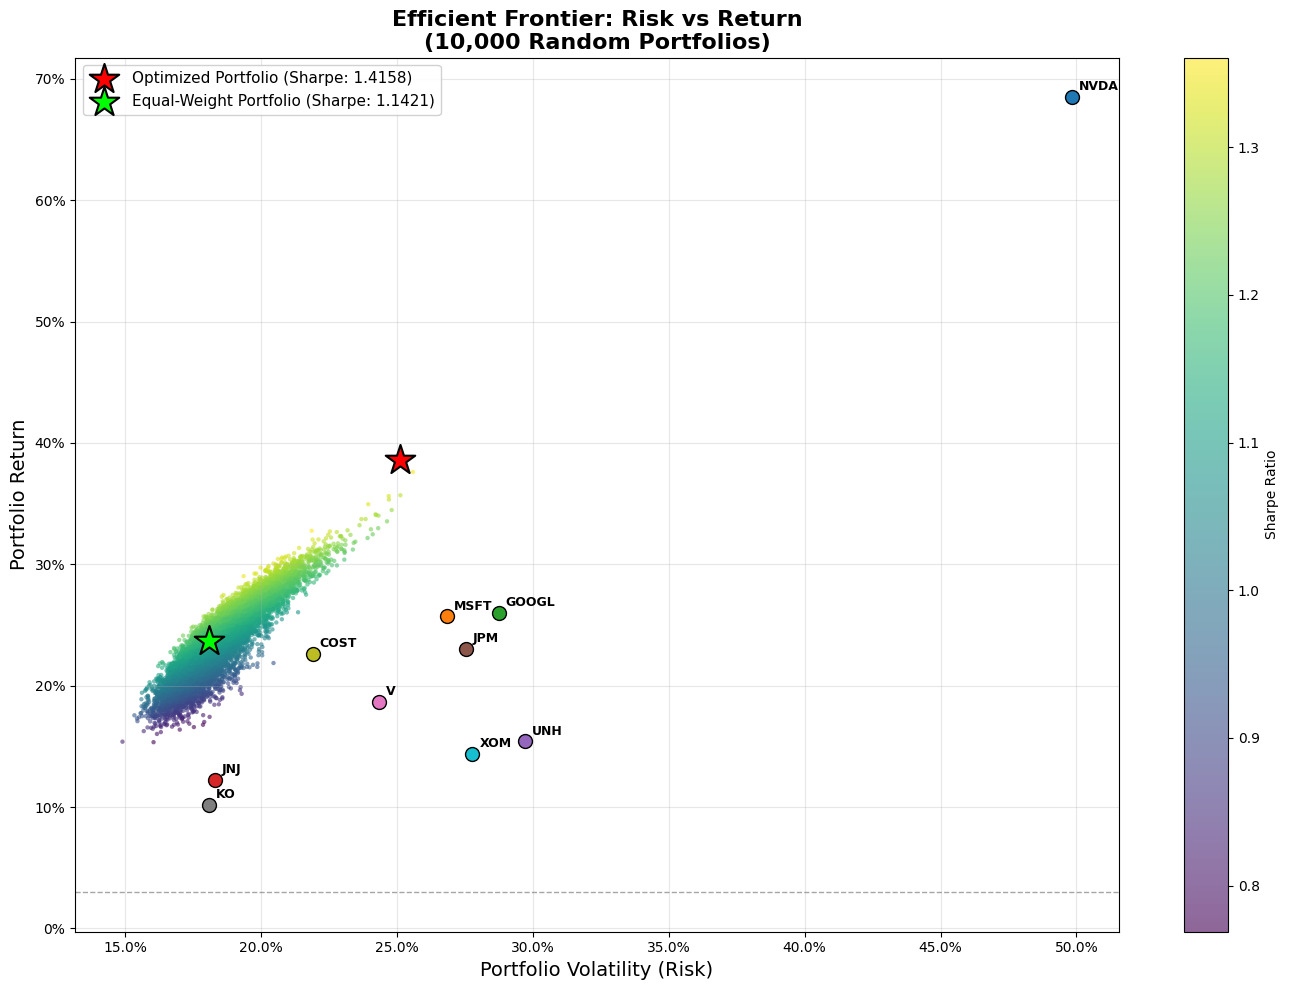


📊 EFFICIENT FRONTIER ANALYSIS SUMMARY

🔹 Best Random Portfolio (Max Sharpe from simulation):
   Return: 32.76%
   Volatility: 21.87%
   Sharpe Ratio: 1.3607

🔹 Minimum Volatility Portfolio (from simulation):
   Return: 15.38%
   Volatility: 14.91%
   Sharpe Ratio: 0.8305

🔹 Optimized Portfolio (Mathematical Optimization):
   Return: 38.59%
   Volatility: 25.13%
   Sharpe Ratio: 1.4158

🔹 Equal-Weight Portfolio:
   Return: 23.67%
   Volatility: 18.09%
   Sharpe Ratio: 1.1421


In [60]:
# ============================================================
# EFFICIENT FRONTIER: Monte Carlo Simulation
# ============================================================

# Number of random portfolios to generate
num_portfolios = 10000
num_assets = len(portfolio_symbols)

# Risk-free rate
risk_free_rate = 0.03

# Arrays to store results
portfolio_returns = np.zeros(num_portfolios)
portfolio_volatilities = np.zeros(num_portfolios)
portfolio_sharpes = np.zeros(num_portfolios)
all_weights = np.zeros((num_portfolios, num_assets))

# Set random seed for reproducibility
np.random.seed(42)

print("Generating 10,000 random portfolios...")

# Generate random portfolios
for i in range(num_portfolios):
    # Generate random weights that sum to 1
    weights = np.random.random(num_assets)
    weights = weights / np.sum(weights)
    all_weights[i, :] = weights
    
    # Calculate portfolio return (annualized)
    portfolio_returns[i] = np.dot(weights, expected_returns)
    
    # Calculate portfolio volatility (annualized)
    portfolio_volatilities[i] = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    
    # Calculate Sharpe ratio
    portfolio_sharpes[i] = (portfolio_returns[i] - risk_free_rate) / portfolio_volatilities[i]

print(f"Generated {num_portfolios} portfolios!")
print(f"Return range: {portfolio_returns.min():.2%} to {portfolio_returns.max():.2%}")
print(f"Volatility range: {portfolio_volatilities.min():.2%} to {portfolio_volatilities.max():.2%}")
print(f"Sharpe ratio range: {portfolio_sharpes.min():.4f} to {portfolio_sharpes.max():.4f}")

# ============================================================
# Create Efficient Frontier Plot
# ============================================================
plt.figure(figsize=(14, 10))

# Scatter plot of random portfolios colored by Sharpe ratio
scatter = plt.scatter(portfolio_volatilities, portfolio_returns, 
                      c=portfolio_sharpes, cmap='viridis', 
                      alpha=0.6, s=10, edgecolors='none')

# Add colorbar
cbar = plt.colorbar(scatter, label='Sharpe Ratio')
cbar.ax.tick_params(labelsize=10)

# Calculate equal-weight portfolio metrics for plotting
equal_weight_weights_arr = np.array([0.1] * num_assets)
equal_weight_return_plot = np.dot(equal_weight_weights_arr, expected_returns)
equal_weight_vol_plot = np.sqrt(np.dot(equal_weight_weights_arr.T, np.dot(cov_matrix, equal_weight_weights_arr)))

# Mark the optimized portfolio with a red star
plt.scatter(optimized_portfolio['Portfolio Volatility'], 
            optimized_portfolio['Portfolio Return'],
            marker='*', color='red', s=500, edgecolors='black', linewidths=1.5,
            label=f"Optimized Portfolio (Sharpe: {optimized_portfolio['Sharpe Ratio']:.4f})", zorder=5)

# Mark the equal-weight portfolio with a green star
plt.scatter(equal_weight_vol_plot, equal_weight_return_plot,
            marker='*', color='lime', s=500, edgecolors='black', linewidths=1.5,
            label=f"Equal-Weight Portfolio (Sharpe: {(equal_weight_return_plot - risk_free_rate) / equal_weight_vol_plot:.4f})", zorder=5)

# Mark individual stocks
for i, symbol in enumerate(portfolio_symbols):
    stock_return = expected_returns.iloc[i] if hasattr(expected_returns, 'iloc') else expected_returns[i]
    stock_vol = np.sqrt(cov_matrix.iloc[i, i]) if hasattr(cov_matrix, 'iloc') else np.sqrt(cov_matrix[i, i])
    plt.scatter(stock_vol, stock_return, marker='o', s=100, edgecolors='black', linewidths=1, zorder=4)
    plt.annotate(symbol, (stock_vol, stock_return), fontsize=9, 
                 xytext=(5, 5), textcoords='offset points', fontweight='bold')

# Labels and title
plt.xlabel('Portfolio Volatility (Risk)', fontsize=14)
plt.ylabel('Portfolio Return', fontsize=14)
plt.title('Efficient Frontier: Risk vs Return\n(10,000 Random Portfolios)', fontsize=16, fontweight='bold')

# Add legend
plt.legend(loc='upper left', fontsize=11, framealpha=0.9)

# Add grid
plt.grid(True, alpha=0.3)

# Add risk-free rate line
plt.axhline(y=risk_free_rate, color='gray', linestyle='--', linewidth=1, alpha=0.7, label=f'Risk-Free Rate ({risk_free_rate:.0%})')

# Format axes as percentages
from matplotlib.ticker import PercentFormatter
plt.gca().xaxis.set_major_formatter(PercentFormatter(1))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

plt.tight_layout()
plt.show()

# ============================================================
# Summary Statistics
# ============================================================
print("\n" + "=" * 70)
print("📊 EFFICIENT FRONTIER ANALYSIS SUMMARY")
print("=" * 70)

# Find the maximum Sharpe ratio portfolio from simulation
max_sharpe_idx = np.argmax(portfolio_sharpes)
print(f"\n🔹 Best Random Portfolio (Max Sharpe from simulation):")
print(f"   Return: {portfolio_returns[max_sharpe_idx]:.2%}")
print(f"   Volatility: {portfolio_volatilities[max_sharpe_idx]:.2%}")
print(f"   Sharpe Ratio: {portfolio_sharpes[max_sharpe_idx]:.4f}")

# Find the minimum volatility portfolio from simulation
min_vol_idx = np.argmin(portfolio_volatilities)
print(f"\n🔹 Minimum Volatility Portfolio (from simulation):")
print(f"   Return: {portfolio_returns[min_vol_idx]:.2%}")
print(f"   Volatility: {portfolio_volatilities[min_vol_idx]:.2%}")
print(f"   Sharpe Ratio: {portfolio_sharpes[min_vol_idx]:.4f}")

print(f"\n🔹 Optimized Portfolio (Mathematical Optimization):")
print(f"   Return: {optimized_portfolio['Portfolio Return']:.2%}")
print(f"   Volatility: {optimized_portfolio['Portfolio Volatility']:.2%}")
print(f"   Sharpe Ratio: {optimized_portfolio['Sharpe Ratio']:.4f}")

print(f"\n🔹 Equal-Weight Portfolio:")
print(f"   Return: {equal_weight_return_plot:.2%}")
print(f"   Volatility: {equal_weight_vol_plot:.2%}")
print(f"   Sharpe Ratio: {(equal_weight_return_plot - risk_free_rate) / equal_weight_vol_plot:.4f}")

### Section 7: Backtesting vs S&P 500 (SPY)

This section compares the historical performance of our portfolios against the S&P 500 benchmark (SPY ETF) to evaluate real-world performance.

[*********************100%***********************]  1 of 1 completed

SPY data downloaded: 2514 trading days
Backtesting period: 2016-02-02 to 2026-01-29
Total trading days: 2513


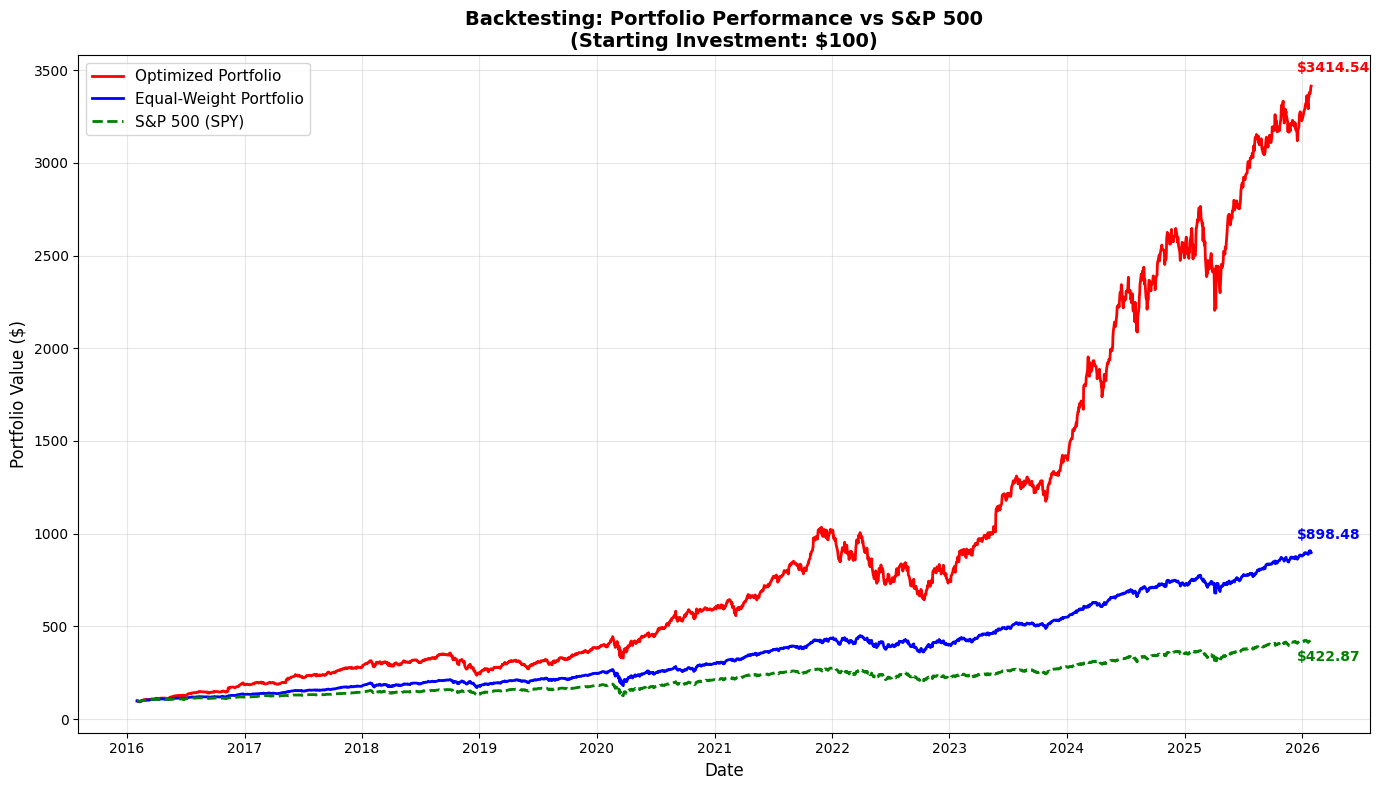


📊 BACKTESTING PERFORMANCE SUMMARY

Period: 2016-02-02 to 2026-01-29
Initial Investment: $100
--------------------------------------------------------------------------------


,Total Return (%),Annualized Return (%),Annualized Volatility (%),Sharpe Ratio,Max Drawdown (%)
Optimized Portfolio,3314.54,42.48,25.13,1.57,-37.81
Equal-Weight Portfolio,798.48,24.63,18.09,1.20,-32.78
S&P 500 (SPY),322.87,15.56,17.91,0.70,-33.72



--------------------------------------------------------------------------------
💰 FINAL PORTFOLIO VALUES (Starting with $100):
--------------------------------------------------------------------------------
   Optimized Portfolio:    $3,414.54  (+3314.5%)
   Equal-Weight Portfolio: $898.48  (+798.5%)
   S&P 500 (SPY):          $422.87  (+322.9%)

--------------------------------------------------------------------------------
📈 OUTPERFORMANCE vs S&P 500:
--------------------------------------------------------------------------------
   Optimized Portfolio:    +2991.67 (+707.5%)
   Equal-Weight Portfolio: +475.61 (+112.5%)


In [61]:
# ============================================================
# BACKTESTING: Portfolio Performance vs S&P 500 (SPY)
# ============================================================

# Download SPY data for the same date range
print("Downloading S&P 500 (SPY) data...")
spy_data = yf.download("SPY", start="2016-01-30", end="2026-01-30")

# Handle MultiIndex columns if present
if isinstance(spy_data.columns, pd.MultiIndex):
    spy_data.columns = spy_data.columns.get_level_values(0)

# Use Close price (auto-adjusted in newer yfinance)
spy_col = 'Adj Close' if 'Adj Close' in spy_data.columns else 'Close'
spy_prices = spy_data[spy_col]

print(f"SPY data downloaded: {len(spy_prices)} trading days")

# ============================================================
# Prepare Portfolio Data
# ============================================================

# Read portfolio data and set Date as index
backtest_data = pd.read_csv("data/stock_data.csv")
if 'Date' in backtest_data.columns:
    backtest_data['Date'] = pd.to_datetime(backtest_data['Date'])
    backtest_data.set_index('Date', inplace=True)

# Define portfolio weights
portfolio_symbols = ["NVDA", "MSFT", "GOOGL", "JNJ", "UNH", "JPM", "V", "KO", "COST", "XOM"]

# Optimized weights (from optimization results)
optimized_weights_dict = {
    'NVDA': 0.39, 'MSFT': 0.00, 'GOOGL': 0.00, 'JNJ': 0.19, 'UNH': 0.00,
    'JPM': 0.12, 'V': 0.00, 'KO': 0.00, 'COST': 0.30, 'XOM': 0.00
}

# Equal weights (10% each)
equal_weights_dict = {symbol: 0.10 for symbol in portfolio_symbols}

# ============================================================
# Calculate Daily Returns
# ============================================================

# Stock returns
stock_returns = backtest_data[portfolio_symbols].pct_change().dropna()

# SPY returns (align dates with portfolio data)
spy_returns = spy_prices.pct_change().dropna()

# Align all data to common dates
common_dates = stock_returns.index.intersection(spy_returns.index)
stock_returns = stock_returns.loc[common_dates]
spy_returns = spy_returns.loc[common_dates]

print(f"Backtesting period: {common_dates[0].strftime('%Y-%m-%d')} to {common_dates[-1].strftime('%Y-%m-%d')}")
print(f"Total trading days: {len(common_dates)}")

# ============================================================
# Calculate Portfolio Returns
# ============================================================

# Optimized portfolio daily returns
opt_weights = np.array([optimized_weights_dict[s] for s in portfolio_symbols])
optimized_daily_returns = (stock_returns * opt_weights).sum(axis=1)

# Equal-weight portfolio daily returns
eq_weights = np.array([equal_weights_dict[s] for s in portfolio_symbols])
equal_weight_daily_returns = (stock_returns * eq_weights).sum(axis=1)

# ============================================================
# Calculate Cumulative Returns (normalized to $100)
# ============================================================

initial_investment = 100

optimized_cumulative = initial_investment * (1 + optimized_daily_returns).cumprod()
equal_weight_cumulative = initial_investment * (1 + equal_weight_daily_returns).cumprod()
spy_cumulative = initial_investment * (1 + spy_returns).cumprod()

# ============================================================
# Plot Cumulative Returns
# ============================================================

plt.figure(figsize=(14, 8))

plt.plot(optimized_cumulative.index, optimized_cumulative.values, 
         label='Optimized Portfolio', color='red', linewidth=2)
plt.plot(equal_weight_cumulative.index, equal_weight_cumulative.values, 
         label='Equal-Weight Portfolio', color='blue', linewidth=2)
plt.plot(spy_cumulative.index, spy_cumulative.values, 
         label='S&P 500 (SPY)', color='green', linewidth=2, linestyle='--')

plt.xlabel('Date', fontsize=12)
plt.ylabel('Portfolio Value ($)', fontsize=12)
plt.title('Backtesting: Portfolio Performance vs S&P 500\n(Starting Investment: $100)', fontsize=14, fontweight='bold')
plt.legend(loc='upper left', fontsize=11)
plt.grid(True, alpha=0.3)

# Add final values as annotations
final_opt = optimized_cumulative.iloc[-1]
final_eq = equal_weight_cumulative.iloc[-1]
final_spy = spy_cumulative.iloc[-1]

plt.annotate(f'${final_opt:.2f}', xy=(optimized_cumulative.index[-1], final_opt),
             xytext=(-10, 10), textcoords='offset points', fontsize=10, color='red', fontweight='bold')
plt.annotate(f'${final_eq:.2f}', xy=(equal_weight_cumulative.index[-1], final_eq),
             xytext=(-10, 10), textcoords='offset points', fontsize=10, color='blue', fontweight='bold')
plt.annotate(f'${final_spy:.2f}', xy=(spy_cumulative.index[-1], final_spy),
             xytext=(-10, -15), textcoords='offset points', fontsize=10, color='green', fontweight='bold')

plt.tight_layout()
plt.show()

# ============================================================
# Calculate Performance Metrics
# ============================================================

def calculate_metrics(returns, risk_free_rate=0.03):
    """Calculate portfolio performance metrics."""
    # Total return
    total_return = (1 + returns).prod() - 1
    
    # Annualized return
    n_years = len(returns) / 252
    annualized_return = (1 + total_return) ** (1/n_years) - 1
    
    # Annualized volatility
    annualized_vol = returns.std() * np.sqrt(252)
    
    # Sharpe ratio
    sharpe = (annualized_return - risk_free_rate) / annualized_vol
    
    # Max drawdown
    cumulative = (1 + returns).cumprod()
    running_max = cumulative.cummax()
    drawdown = (cumulative - running_max) / running_max
    max_drawdown = drawdown.min()
    
    return {
        'Total Return (%)': total_return * 100,
        'Annualized Return (%)': annualized_return * 100,
        'Annualized Volatility (%)': annualized_vol * 100,
        'Sharpe Ratio': sharpe,
        'Max Drawdown (%)': max_drawdown * 100
    }

# Calculate metrics for all strategies
opt_metrics = calculate_metrics(optimized_daily_returns)
eq_metrics = calculate_metrics(equal_weight_daily_returns)
spy_metrics = calculate_metrics(spy_returns)

# ============================================================
# Create Metrics Comparison Table
# ============================================================

metrics_table = pd.DataFrame({
    'Optimized Portfolio': opt_metrics,
    'Equal-Weight Portfolio': eq_metrics,
    'S&P 500 (SPY)': spy_metrics
}).T

# Format the table
print("\n" + "=" * 80)
print("📊 BACKTESTING PERFORMANCE SUMMARY")
print("=" * 80)
print(f"\nPeriod: {common_dates[0].strftime('%Y-%m-%d')} to {common_dates[-1].strftime('%Y-%m-%d')}")
print(f"Initial Investment: ${initial_investment}")
print("-" * 80)

display(metrics_table.round(2))

# ============================================================
# Final Value Summary
# ============================================================
print("\n" + "-" * 80)
print("💰 FINAL PORTFOLIO VALUES (Starting with $100):")
print("-" * 80)
print(f"   Optimized Portfolio:    ${final_opt:,.2f}  ({(final_opt/100-1)*100:+.1f}%)")
print(f"   Equal-Weight Portfolio: ${final_eq:,.2f}  ({(final_eq/100-1)*100:+.1f}%)")
print(f"   S&P 500 (SPY):          ${final_spy:,.2f}  ({(final_spy/100-1)*100:+.1f}%)")

# Outperformance
print("\n" + "-" * 80)
print("📈 OUTPERFORMANCE vs S&P 500:")
print("-" * 80)
print(f"   Optimized Portfolio:    {(final_opt - final_spy):+.2f} ({((final_opt/final_spy)-1)*100:+.1f}%)")
print(f"   Equal-Weight Portfolio: {(final_eq - final_spy):+.2f} ({((final_eq/final_spy)-1)*100:+.1f}%)")